<a href="https://colab.research.google.com/github/Umesh2851997/-Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Zomato Restaurant Clustering and Sentiment Analysis






## **1. Problem Statement**
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **2. Importing the libraries and Dataset**

In [156]:
# Importing the numpy library for numerical operations
import numpy as np

# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the matplotlib library for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# Importing the seaborn library for statistical data visualization based on matplotlib
import seaborn as sns

# Importing the WordCloud library for generating word clouds from text data
from wordcloud import WordCloud


In [157]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
#importing both datasets
meta_data=pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv', encoding= 'unicode_escape')
review_data=pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv', encoding= 'unicode_escape')

# **3. Understanding the data**

## **3.1. Meta data**

In [159]:
meta_df = meta_data.copy() #creating copy of review dataset

In [160]:
meta_df.head() #First 5 rows of the data

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [161]:
#Last 5 rows of the data
meta_df.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [162]:
meta_df.shape

(105, 6)

**There are 105 rows and 6 columns in Meta Data file**

## **3.2. Review Data**

In [163]:
review_df = review_data.copy() #creating a copy of the dataset

In [164]:
review_df.head() #Top 5 rows of the dataset

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [165]:
review_df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [166]:
review_df.shape

(10000, 7)

**There are 10000 rows & 7 columns in review dataset**

## **3.3. Attribute information**

**Zomato Restaurant names and Metadata**
1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

**Zomato Restaurant reviews**

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# **4. Data Cleaning and Pre-Processing**

## **4.1. Meta Data cleaning and pre-processing**

In [167]:
# Info about meta data
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [168]:
# Summary of meta Data
meta_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [169]:
#Checking for null values
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [170]:
# Names of the restaurants
meta_df['Name'].value_counts()

Beyond Flavours                           1
Diners Pavilion                           1
Squeeze @ The Lime                        1
The Old Madras Baking Company             1
Royal Spicy Restaurant                    1
                                         ..
Marsala Food Company                      1
Pista House                               1
Pot Pourri                                1
Hunger Maggi Point                        1
Republic Of Noodles - Lemon Tree Hotel    1
Name: Name, Length: 105, dtype: int64

In [171]:
# Checking duplicate rows in dataset
meta_df.duplicated(keep='last').sum()

0

In [172]:
# Checking duplicate restaurant name
meta_df['Name'].duplicated().sum()

0

In [173]:
meta_df['Cost']

0        800
1        800
2      1,300
3        800
4      1,200
       ...  
100      600
101      200
102      500
103      250
104    1,700
Name: Cost, Length: 105, dtype: object

In [174]:
#Change Datatype
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

In [175]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [176]:
#There are some null values in the dataset.
meta_df['Collections']

0      Food Hygiene Rated Restaurants in Hyderabad, C...
1                                    Hyderabad's Hottest
2                     Great Buffets, Hyderabad's Hottest
3                                 Late Night Restaurants
4      Best Bars & Pubs, Food Hygiene Rated Restauran...
                             ...                        
100                                                  NaN
101                                                  NaN
102                                                  NaN
103                                                  NaN
104                                 Pan-Asian Delicacies
Name: Collections, Length: 105, dtype: object

In [177]:
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [178]:
#we are now droping null values from collections & Timings
meta_df.dropna(subset=['Collections', 'Timings'], inplace=True)

## **4.2. Review Data cleaning and pre-processing**

In [179]:
# Info about review data
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [180]:
#Summary of Review Data
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [181]:
#Check for null values
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

**Numerous columns contain null values, necessitating their replacement with suitable values.**

In [182]:
#Checking unique values
review_df['Reviewer'].unique()


array(['Rusha Chakraborty', 'Anusha Tirumalaneedi', 'Ashok Shekhawat',
       ..., 'Ramandeep', 'Nayana Shanbhag', 'Bhargava Krishna'],
      dtype=object)

In [183]:
# Unique values in 'Rating' column
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [184]:
review_df['Rating'] = review_df['Rating'].replace('Like', np.nan).astype('float64')


In [185]:
review_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5, nan])

In [186]:
#Mean of Ratings Column
print(review_df['Rating'].mean())

3.601044071880333


In [187]:
#Filling full values with Mean imputation
review_df['Rating'].fillna(review_df['Rating'].mean(), inplace = True)

In [188]:
review_df['Metadata']

0             1 Review , 2 Followers
1            3 Reviews , 2 Followers
2            2 Reviews , 3 Followers
3              1 Review , 1 Follower
4            3 Reviews , 2 Followers
                    ...             
9995       53 Reviews , 54 Followers
9996        2 Reviews , 53 Followers
9997      65 Reviews , 423 Followers
9998      13 Reviews , 144 Followers
9999    472 Reviews , 1302 Followers
Name: Metadata, Length: 10000, dtype: object

In [189]:
# split metadata column into 2 columns i.e. Reviews and followers and storing the count of reviews and followers respestively
review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])
review_df['Followers']= pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

<ipython-input-189-fec6f3a3dd0b>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str


In [190]:
# Dropping Metadata column
review_df = review_df.drop(['Metadata'], axis =1)

In [191]:
# Converting Time column into Time, Year, Month, Hour
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour

In [192]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3.0,2.0,2019.0,5.0,21.0


In [193]:
# Replacing followers and reviews null values into 0
review_df['Followers'].fillna(0,inplace=True)
review_df['Reviews'].fillna(0,inplace=True)

In [194]:
# we can drop the remaining missing data
review_df.dropna(inplace=True)

In [195]:
#Resetting the index after dropping null values
review_df.reset_index(inplace = True)

In [198]:
#Reseting th index after droppig null values from meta data set
meta_df.reset_index(inplace = True)

In [196]:
#Now there is no null values in the dataset....
review_df.isnull().sum().to_frame().T

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,0,0,0,0,0,0,0,0,0,0,0


In [197]:
meta_df.isnull().sum().to_frame().T

,Name,Links,Cost,Collections,Cuisines,Timings
0,0,0,0,0,0,0


# **5. Exploratory data analysis**

## **5.1. EDA on MetaData Dataset**

In [201]:
meta_df.columns

Index(['index', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [207]:
#Finding the top 10 restarents by Cost
top_10_rest = meta_df[['Name','Cost']].groupby('Name').sum().sort_values(by = 'Cost', ascending = False).reset_index().head(10)
top_10_rest

,Name,Cost
0,Collage - Hyatt Hyderabad Gachibowli,2800
1,Feast - Sheraton Hyderabad Hotel,2500
2,10 Downing Street,1900
3,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
4,Republic Of Noodles - Lemon Tree Hotel,1700
5,Mazzo - Marriott Executive Apartments,1700
6,Arena Eleven,1600
7,B-Dubs,1600
8,Barbeque Nation,1600
9,The Indi Grill,1500


<ipython-input-215-5c78d2a11fef>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x, y = y, palette='plasma')


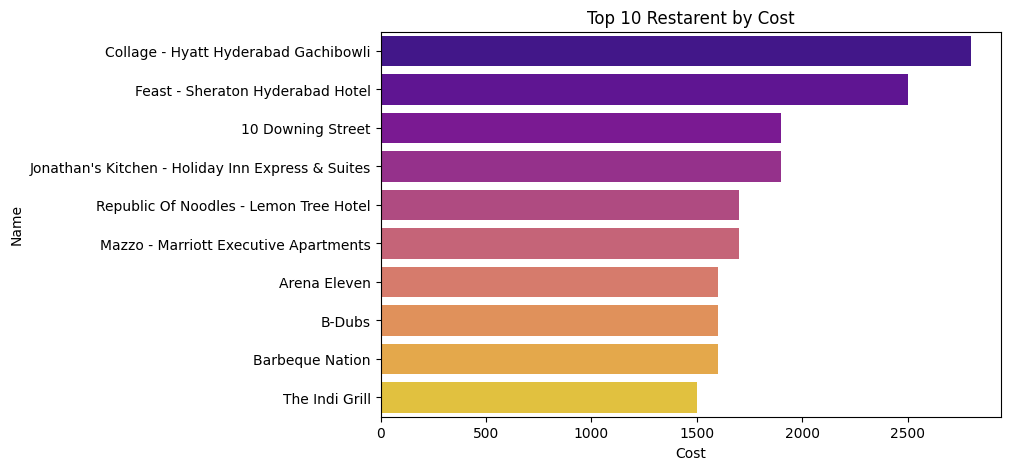

In [215]:
#ploting the top 10 expensive restra
plt.figure(figsize=(8,5))
x = top_10_rest['Cost']  #x axis
y = top_10_rest['Name']  #y axis
plt.title("Top 10 Restarent by Cost")
plt.ylabel("Name")
plt.xlabel("Cost")
sns.barplot(x = x, y = y, palette='plasma')
plt.show()

**Collage - Hyatt Hyderabad Gachibowli is the costliest restaurant followed by Feast - Sheraton Hyderabad Hotel**